In [1]:
import os 
os.getcwd()


'C:\\Users\\suraj'

In [2]:
#changing directory

os.chdir("c:\\Users\\suraj\\Desktop")

In [3]:
#importing packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
garage = pd.read_csv("Dummydata.csv")

In [5]:
garage.head()

,GarageType,GarageArea,SalePrice
0,Attchd,25000.0,208500
1,Attchd,NaN,181500
2,Attchd,NaN,223500
3,Detchd,NaN,140000
4,Attchd,836.0,250000


In [6]:
#chacking the missing values

pd.DataFrame(garage).isnull().sum()

GarageType    86
GarageArea    83
SalePrice      0
dtype: int64

In [7]:
#slicing data

x=garage.iloc[:,0:2].values

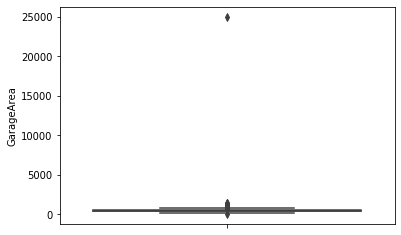

In [8]:
#boxplot to check Outlier

sns.boxplot(y='GarageArea', data=garage)

In [9]:
# filling the miosing values 

from sklearn.preprocessing import Imputer
new=Imputer(missing_values='NaN', strategy ='median', axis=0)
x[:,1:2]=new.fit_transform(x[:,1:2])


C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
pd.DataFrame(x).isnull().sum()

0    86
1     0
dtype: int64

In [11]:
#filling the missing character value

from sklearn.impute import SimpleImputer
newX=SimpleImputer(strategy='most_frequent')
x[:,0:1]=newX.fit_transform(x[:,0:1])

In [12]:
# calculating Quartile value

Q1=garage.quantile(0.25)
Q3=garage.quantile(0.75)
IQR=Q3-Q1

In [15]:
garage2=garage[~((garage<(Q1-1.5*IQR))|(garage>(Q3+-1.5*IQR))).any(axis=1)]

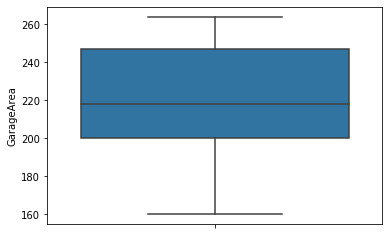

In [16]:
sns.boxplot(y='GarageArea', data=garage2)

In [17]:
## Encoding (LabelEncoder & OneHotEncoding)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
newy=LabelEncoder()
x[:,0]=newy.fit_transform(x[:,0])
x

array([[1, 25000.0],
       [1, 484.0],
       [1, 484.0],
       ...,
       [1, 252.0],
       [1, 240.0],
       [1, 276.0]], dtype=object)

In [18]:
onehot=OneHotEncoder(categorical_features=[0])
x=onehot.fit_transform(x).toarray()
x

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 2.50e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 4.84e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 4.84e+02],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 2.52e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 2.40e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 2.76e+02]])

In [23]:
## Feature scaling 
##Standarisation

from sklearn.preprocessing import StandardScaler
x_std= StandardScaler()
std_sc=x_std.fit_transform(x)

In [24]:
std_sc

array([[-0.06423821,  0.72938618, -0.11482721, ..., -0.07875671,
        -0.5984476 , 36.76188595],
       [-0.06423821,  0.72938618, -0.11482721, ..., -0.07875671,
        -0.5984476 , -0.04815503],
       [-0.06423821,  0.72938618, -0.11482721, ..., -0.07875671,
        -0.5984476 , -0.04815503],
       ...,
       [-0.06423821,  0.72938618, -0.11482721, ..., -0.07875671,
        -0.5984476 , -0.39649609],
       [-0.06423821,  0.72938618, -0.11482721, ..., -0.07875671,
        -0.5984476 , -0.41451373],
       [-0.06423821,  0.72938618, -0.11482721, ..., -0.07875671,
        -0.5984476 , -0.36046081]])

In [25]:
##Normalisation

from sklearn.preprocessing import Normalizer
nmz= Normalizer()
nmx=nmz.fit_transform(x)


In [26]:
nmx

array([[0.00000000e+00, 4.00000000e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99999999e-01],
       [0.00000000e+00, 2.06611129e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99997866e-01],
       [0.00000000e+00, 2.06611129e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99997866e-01],
       ...,
       [0.00000000e+00, 3.96822272e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99992127e-01],
       [0.00000000e+00, 4.16663050e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99991320e-01],
       [0.00000000e+00, 3.62316462e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99993436e-01]])